In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
%matplotlib inline

In [2]:
death = pd.read_csv('data/celebrity_deaths.csv')
death.head()

,age,birth_year,cause_of_death,death_month,death_year,famous_for,name,nationality,fame_score
0,85,1921,natural causes,January,2006,businessman chairman of IBM (1973–1981),Frank Cary,American,6030.0
1,49,1957,murdered,January,2006,musician (House of Freaks Gutterball),Bryan Harvey,American,5867.0
2,64,1942,Alzheimer's disease,January,2006,baseball player (Oakland Athletics),Paul Lindblad,American,6711.0
3,86,1920,Alzheimer's disease,January,2006,politician Representative from Oregon (1957–1...,Charles O. Porter,American,6330.0
4,82,1924,cancer,January,2006,nightclub owner (Tropicana Club),Ofelia Fox,Cuban,4353.0


In [3]:
# clean data set
death_all = death.copy()
def group_deathcause(cause):
    mod_cause = ""
    cause = str(cause)
    if "cancer" in cause:
        mod_cause = "cancer"
    elif "heart" in cause or "cardiac" in cause:
        mod_cause = "heart disease"
    elif "stroke" in cause :
        mod_cause = "stroke"
    elif "diabetes" in cause:
        mod_cause = "diabetes"
    elif "gunshot" == cause:
        mod_cause = "shot"
    elif "suicide" in cause:
        mod_cause = "suicide"
    else:
        mod_cause = cause
    return mod_cause.strip()

def age_categorizer(age):
    category = ""
    if (age<18):
        category = "child"
    elif (age<30):
        category = "young"
    elif (age<60) :
        category = "adult"
    else:
        category = "old"
    return category

death_all.drop(death_all[death_all.age == 0].index)
death_all['cause_of_death'].fillna('unknown', inplace=True)
death_all['age_category'] = death_all.apply(lambda x: age_categorizer(x['age']), axis=1 )
death_all['cause_of_death'] = death_all.apply(lambda x: group_deathcause(x['cause_of_death']), axis=1 )


death_all.head()

,age,birth_year,cause_of_death,death_month,death_year,famous_for,name,nationality,fame_score,age_category
0,85,1921,natural causes,January,2006,businessman chairman of IBM (1973–1981),Frank Cary,American,6030.0,old
1,49,1957,murdered,January,2006,musician (House of Freaks Gutterball),Bryan Harvey,American,5867.0,adult
2,64,1942,Alzheimer's disease,January,2006,baseball player (Oakland Athletics),Paul Lindblad,American,6711.0,old
3,86,1920,Alzheimer's disease,January,2006,politician Representative from Oregon (1957–1...,Charles O. Porter,American,6330.0,old
4,82,1924,cancer,January,2006,nightclub owner (Tropicana Club),Ofelia Fox,Cuban,4353.0,old


#### Does the number of celebrities death is highest in 2016?

In [4]:
death_2016 = death_all[death_all.death_year == 2016]
death_other_years = death_all.drop(death_all[death_all.death_year == 2016].index)


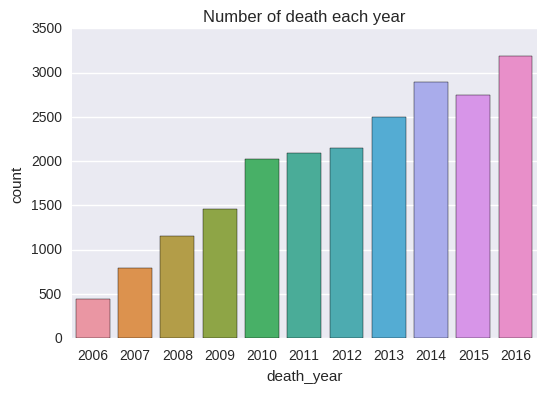

In [5]:
sns.countplot(death_all.death_year)
plt.title('Number of death each year')

#### Reason for celebrities death in 2016

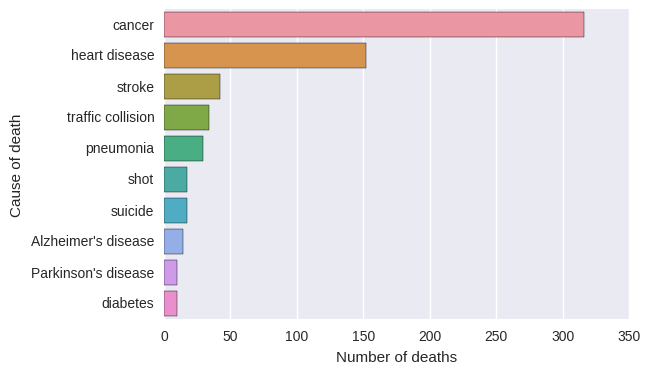

In [6]:

def known_cod(data, group_column):
    death_by_cod = data[data.cause_of_death != 'unknown'].groupby(group_column)['name'].count().reset_index()
    death_by_cod = death_by_cod.rename(columns={'name':'count'})
    total = death_by_cod['count'].sum()
    death_by_cod['ratio'] = death_by_cod.apply(lambda x: x['count']/total, axis=1)
    return death_by_cod.sort_values(by='ratio', ascending=False)

# plot it!

death_by_cod_2016 = known_cod(death_2016, 'cause_of_death')
plt.figure(figsize=(6, 4))
ax = sns.barplot(x='count', y='cause_of_death', data=death_by_cod_2016.head(10))
ax.set(xlabel='Number of deaths', ylabel='Cause of death' )



#### How the top causes of death in 2016 are different from previous years?

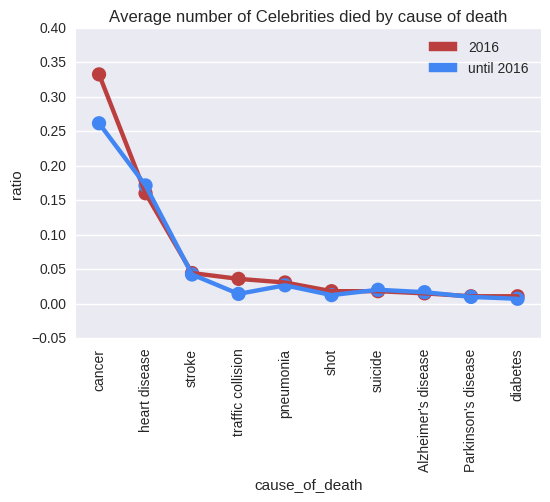

In [7]:

death_other_years_by_cod = known_cod(death_other_years, 'cause_of_death').rename(columns={'ratio':'before2016ratio'})[['cause_of_death', 'before2016ratio']]
cod_ratio = pd.merge(death_by_cod_2016, death_other_years_by_cod, on='cause_of_death', how='left')

ax = sns.pointplot(x='cause_of_death', y='ratio', data=cod_ratio.head(10), color="#bb3f3f", label="2016")
sns.pointplot(x="cause_of_death", y="before2016ratio", data=cod_ratio.head(10),color="#4286f4", label="before_2016")
ax.set_xticklabels(rotation=90, labels=cod_ratio.cause_of_death)
ax.set(ylabel='ratio')

import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color="#bb3f3f", label='2016')
blu_patch = mpatches.Patch(color="#4286f4", label='until 2016')
plt.legend(handles=[red_patch,blu_patch])
plt.title("Average number of Celebrities died by cause of death")


#### Which country has unusual death due to cancer?

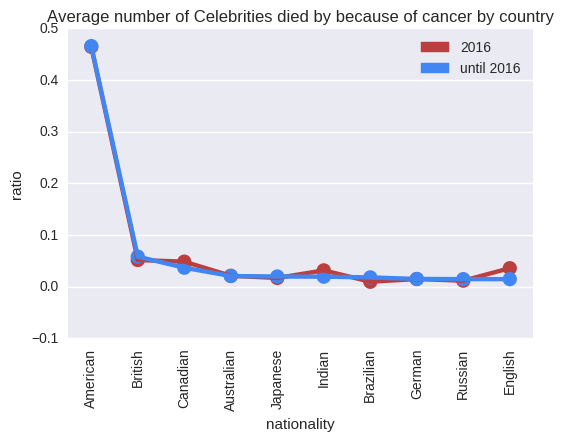

In [8]:

death_other_years_by_nationality = known_cod(death_other_years, 'nationality').rename(columns={'ratio':'before2016ratio'})[['nationality', 'before2016ratio']]
death_2016_by_nationality = known_cod(death_2016, 'nationality').rename(columns={'ratio':'2016ratio'})[['nationality', '2016ratio']]
nationality_cod_ratio = pd.merge(death_other_years_by_nationality, death_2016_by_nationality, on='nationality', how='left')
nationality_cod_ratio.head()

ax = sns.pointplot(x='nationality', y='2016ratio', data=nationality_cod_ratio.head(10), color="#bb3f3f", label="2016")
sns.pointplot(x="nationality", y="before2016ratio", data=nationality_cod_ratio.head(10),color="#4286f4", label="before_2016")
ax.set_xticklabels(rotation=90, labels=nationality_cod_ratio.nationality)
ax.set(ylabel='ratio')

import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color="#bb3f3f", label='2016')
blu_patch = mpatches.Patch(color="#4286f4", label='until 2016')
plt.legend(handles=[red_patch,blu_patch])
plt.title("Average number of Celebrities died by because of cancer by country")



#### Which type of killed most of celebrities?

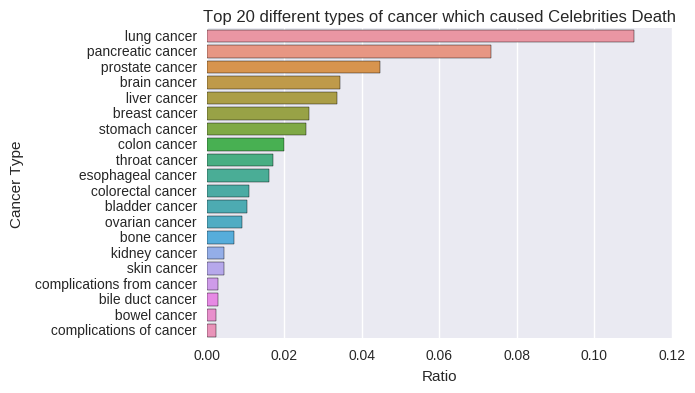

In [9]:

death_2016.head()
death2 = death.copy()
death2['cause_of_death'].fillna('unknown', inplace=True)

death_by_cancer =  death2[death2.cause_of_death.str.contains('cancer')].groupby('cause_of_death')['name'].count().reset_index()
death_by_cancer = death_by_cancer.rename(columns={'name':'count'})[['cause_of_death', 'count']]
death_by_cancer = death_by_cancer.sort_values(by='count', ascending=False)
total_cancer_death = death_by_cancer['count'].sum()
death_by_cancer['ratio'] = death_by_cancer.apply(lambda x: x['count']/total_cancer_death, axis=1)
death_by_cancer = death_by_cancer.iloc[1:]
#death_2016 = death_all[death_all.death_year == 2016]

plt.figure(figsize=(6, 4))
ax = sns.barplot(x='ratio', y='cause_of_death', data=death_by_cancer.head(20))
ax.set(xlabel='Ratio', ylabel='Cancer Type' )
plt.title("Top 20 different types of cancer which caused Celebrities Death")
plt.show()



#### Death happened in each month, Is there anything fishy in December !?

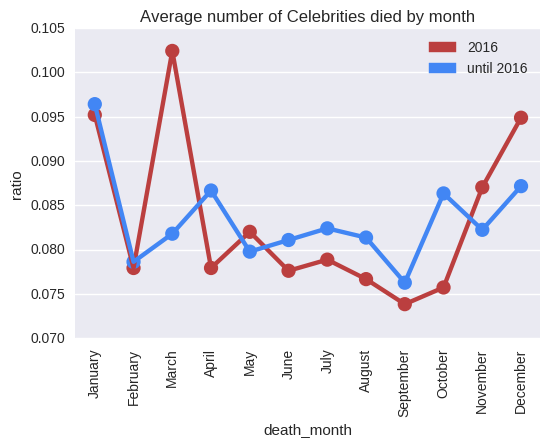

In [12]:

month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
              'August', 'September', 'October', 'November', 'December']
death_2016_by_death_month = death_2016.groupby('death_month')['name'].count().reset_index().rename(columns={'name':'count'})
death_2016_by_death_month['2016ratio'] = death_2016_by_death_month.apply(lambda x: x['count']/death_2016_by_death_month['count'].sum(), axis=1)
death_2016_by_death_month.drop('count', axis=1, inplace=True)

death_other_years_by_death_month = death_other_years.groupby('death_month')['name'].count().reset_index().rename(columns={'name':'count'})
death_other_years_by_death_month['before2016ratio'] = death_other_years_by_death_month.apply(lambda x: x['count']/death_other_years_by_death_month['count'].sum(), axis=1)
death_other_years_by_death_month.drop('count', axis=1, inplace=True)

death_by_death_month = death_other_years_by_death_month.merge(death_2016_by_death_month, on='death_month', how='left')

month_indexes = []

for month_name in month_names:
    # I know this is shit, but now I don't know any in-built function to sort this :-( 
    month_indexes.append(np.where([death_by_death_month.death_month == month_name])[1][0])
    
death_by_death_month = death_by_death_month.reindex(month_indexes)

ax = sns.pointplot(x='death_month', y='2016ratio', data=death_by_death_month, color="#bb3f3f", label="2016")
sns.pointplot(x="death_month", y="before2016ratio", data=death_by_death_month,color="#4286f4", label="before_2016")
ax.set_xticklabels(rotation=90, labels=death_by_death_month.death_month)
ax.set(ylabel='ratio')

import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color="#bb3f3f", label='2016')
blu_patch = mpatches.Patch(color="#4286f4", label='until 2016')
plt.legend(handles=[red_patch,blu_patch])
plt.title("Average number of Celebrities died by month")




Seems march is villan for most celebrities, have to investigate further on March!



#### Cause for death in march month

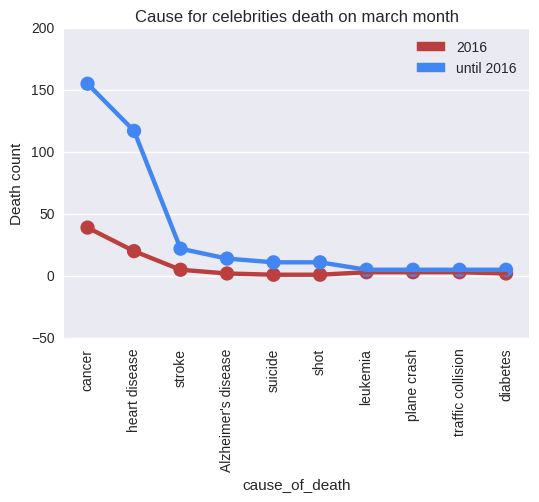

In [48]:

death_2016_march = death_2016[death_2016.death_month == 'March']
death_other_years_march = death_other_years[death_other_years.death_month == 'March']

death_other_years_march_by_cause = death_other_years_march.groupby('cause_of_death').count().reset_index()
death_other_years_march_by_cause  = death_other_years_march_by_cause.rename(columns={'name':'count'})[['cause_of_death', 'count']]

death_2016_march_by_cause = death_2016_march.groupby('cause_of_death').count().reset_index()
death_2016_march_by_cause  = death_2016_march_by_cause.rename(columns={'name':'2016count'})[['cause_of_death', '2016count']]
death_by_march_by_cause = death_2016_march_by_cause.merge(death_other_years_march_by_cause, on='cause_of_death', how='left')

death_by_march_by_cause = death_by_march_by_cause.sort_values(by='count', ascending=False)[1:]
death_by_march_by_cause = death_by_march_by_cause.head(10)

ax = sns.pointplot(x='cause_of_death', y='2016count', data=death_by_march_by_cause, color="#bb3f3f", label="2016")
sns.pointplot(x="cause_of_death", y="count", data=death_by_march_by_cause, color="#4286f4", label="before_2016")
ax.set_xticklabels(rotation=90, labels=death_by_march_by_cause.cause_of_death)
ax.set(ylabel='Death count')

import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color="#bb3f3f", label='2016')
blu_patch = mpatches.Patch(color="#4286f4", label='until 2016')
plt.legend(handles=[red_patch,blu_patch])
plt.title("Cause for celebrities death on march month")




#### What was the main cause of the death in each age category

/home/vimal/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


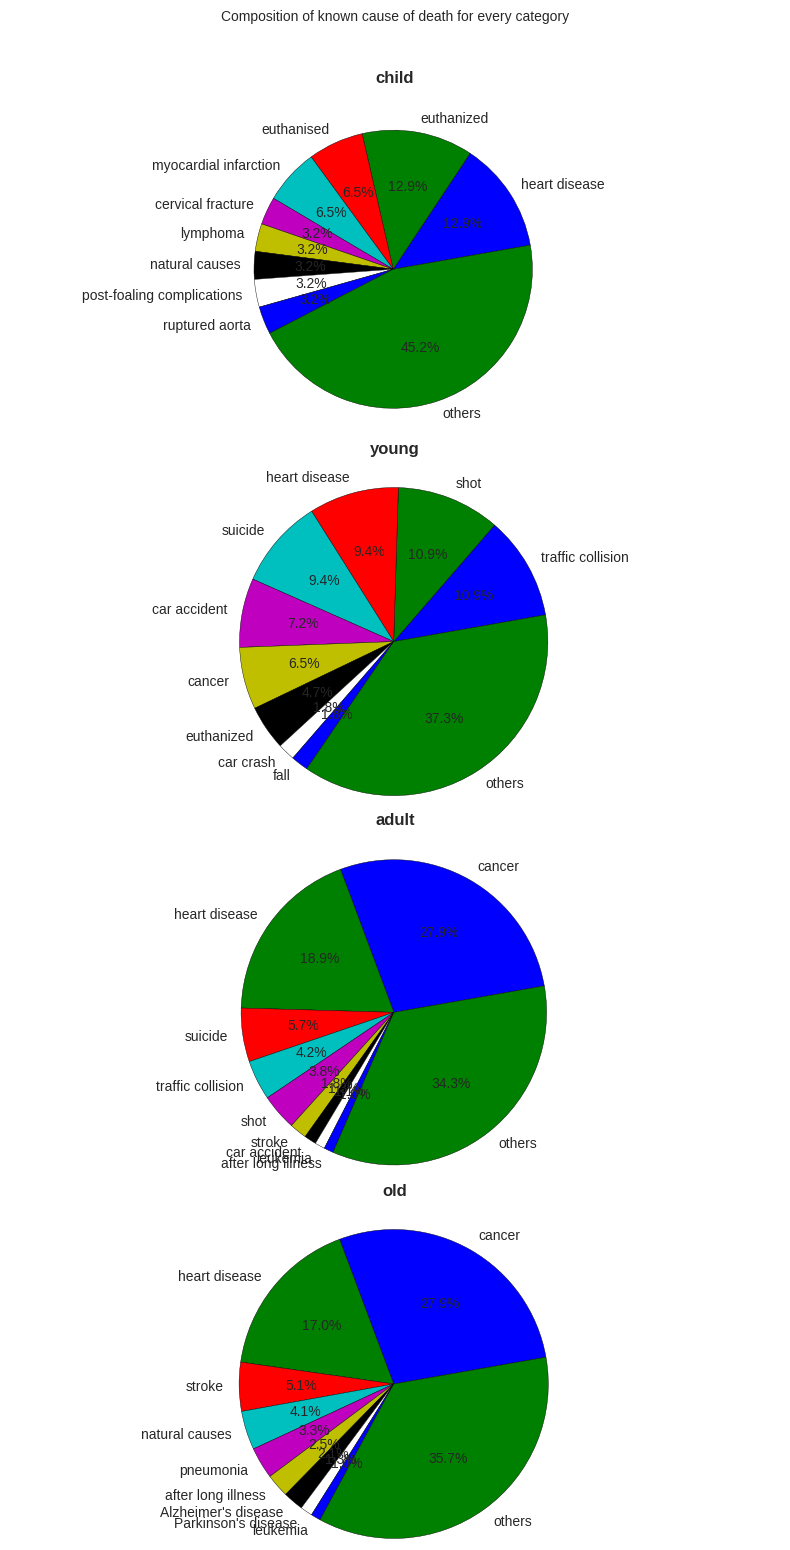

In [109]:
death_all_by_age_group_cod = death_all.groupby(['age_category', 'cause_of_death']).count().reset_index()
death_all_by_age_group_cod = death_all_by_age_group_cod.sort_values(by='age_category', ascending=False)
death_all_by_age_group_cod[death_all_by_age_group_cod.age_category == 'young']

f = plt.figure(figsize=(8,15))
the_grid = GridSpec(4, 1)
for cat in [("child",0,0),("young",1,0),("adult",2,0),("old",3,0)]:
    death_all_by_age_group_cod_cat = death_all_by_age_group_cod[death_all_by_age_group_cod.age_category == cat[0]]
    death_all_by_age_group_cod_cat = death_all_by_age_group_cod_cat.rename(columns={'name':'count'})[['cause_of_death', 'count']]
    death_all_by_age_group_cod_cat = death_all_by_age_group_cod_cat.sort_values(by='count', ascending=False)
    plot_this = death_all_by_age_group_cod_cat[1:10]
    plot_this.loc[len(plot_this.index) + 1] = ['others', death_all_by_age_group_cod_cat['count'][11:].sum()]
     
    plt.subplot(the_grid[cat[1],cat[2] ], aspect=1)
    plt.pie(plot_this['count'], labels =plot_this.cause_of_death, autopct='%1.1f%%', startangle=10 )
    plt.axis('equal')
    plt.title(cat[0],y=1.08,fontweight="bold")
    plt.tight_layout()
f.suptitle("Composition of known cause of death for every category",y=1.03)
plt.show()